In [ ]:
!git clone https://github.com/backgom2357/Recommender_system_via_deep_RL.git

Cloning into 'Recommender_system_via_deep_RL'...
remote: Enumerating objects: 385, done.
remote: Counting objects: 100% (385/385), done.
remote: Compressing objects: 100% (271/271), done.
remote: Total 385 (delta 203), reused 288 (delta 111), pack-reused 0
Receiving objects: 100% (385/385), 58.36 MiB | 25.22 MiB/s, done.
Resolving deltas: 100% (203/203), done.


In [ ]:
%cd Recommender_system_via_deep_RL/

/content/Recommender_system_via_deep_RL


In [ ]:
!pip install wandb

     |████████████████████████████████| 1.7 MB 5.5 MB/s 
     |████████████████████████████████| 143 kB 39.6 MB/s 
     |████████████████████████████████| 97 kB 6.5 MB/s 
     |████████████████████████████████| 180 kB 46.4 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-py3-none-any.whl size=6502 sha256=be2ff07346b9b35240131d5ae5ec3078f59603838c7adf2c2db6ce5d6c538433
  Stored in directory: /root/.cache/pip/wheels/50/ca/fa/8fca8d246e64f19488d07567547ddec8eb084e8c0d7a59226a
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=e80480e3d376be85ba8abf5aaa16e8942b073501d43c667227bdeb0ea02c9c90
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built subprocess32 pathtools


In [ ]:
!kaggle datasets download -d odedgolden/movielens-1m-dataset

  0% 0.00/5.83M [00:00<?, ?B/s]
100% 5.83M/5.83M [00:00<00:00, 53.8MB/s]


In [ ]:
!unzip ./movielens-1m-dataset.zip

Archive:  ./movielens-1m-dataset.zip
  inflating: README                  
  inflating: movies.dat              
  inflating: ratings.dat             
  inflating: users.dat               


In [ ]:
%cd Recommender_system_via_deep_RL/

/content/Recommender_system_via_deep_RL


In [ ]:
!python train.py

Data loading...
Traceback (most recent call last):
  File "train.py", line 25, in <module>
    ratings_list = [i.strip().split("::") for i in open(os.path.join(DATA_DIR,'ratings.dat'), 'r').readlines()]
FileNotFoundError: [Errno 2] No such file or directory: '/content/Recommender_system_via_deep_RL/ratings.dat'


In [ ]:
%cd ..

/content


In [ ]:
!cp movies.dat "./Recommender_system_via_deep_RL"

In [ ]:
!cp ratings.dat "./Recommender_system_via_deep_RL"
!cp users.dat "./Recommender_system_via_deep_RL"

In [ ]:
%cd Recommender_system_via_deep_RL

/content/Recommender_system_via_deep_RL
Data loading...
Data loading complete!
Data preprocessing...
DONE!
2022-01-29 15:01:20.692416: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Traceback (most recent call last):
  File "train.py", line 58, in <module>
    recommender = DRRAgent(env, users_num, items_num, STATE_SIZE, use_wandb=False)
  File "/content/Recommender_system_via_deep_RL/recommender.py", line 47, in __init__
    self.embedding_network.load_weights('/home/diominor/Workspace/DRR/save_weights/user_movie_embedding_case4.h5')
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/h5py/_hl/files.py", line 427, in __init__
    swmr=swmr)
  File "/usr/local/lib/python3.7/dist-packages/h5py/_hl/files.py", line 190, in make_fid
    fid = h5f.open(name

In [ ]:
!python train.py

Data loading...
Data loading complete!
Data preprocessing...
DONE!
2022-01-29 15:03:56.022856: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
tcmalloc: large alloc 1200005120 bytes == 0x5610d4b18000 @  0x7f896ecfe001 0x7f896c8bc54f 0x7f896c90cb58 0x7f896c910b17 0x7f896c9af203 0x5610c0117544 0x5610c0117240 0x5610c018b627 0x5610c0119039 0x5610c015a159 0x5610c01570a4 0x5610c0117c52 0x5610c018ac25 0x5610c01859ee 0x5610c011948c 0x5610c015a159 0x5610c01570a4 0x5610c0117d49 0x5610c018b94f 0x5610c01859ee 0x5610c01856f3 0x5610c024f4c2 0x5610c024f83d 0x5610c024f6e6 0x5610c0227163 0x5610c0226e0c 0x7f896dae6bf7 0x5610c0226cea
recommended items : 382,  epsilon : 0.999, reward : -0.5
0/8000, precision : 29%, total_reward:44.5, q_loss : 0.09107863157987595, mean_action : -0.10735046271354907
recommended items : 49,  epsilon : 0.999, reward : -0.5
1/8000, precision : 15%, total_reward:-6.0, q_loss : 0.04083862155675

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
import time

from envs import OfflineEnv
from recommender import DRRAgent

import os

ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, '')
STATE_SIZE = 10

In [ ]:
#Loading datasets
ratings_list = [i.strip().split("::") for i in open(os.path.join(DATA_DIR,'ratings.dat'), 'r').readlines()]
users_list = [i.strip().split("::") for i in open(os.path.join(DATA_DIR,'users.dat'), 'r').readlines()]
movies_list = [i.strip().split("::") for i in open(os.path.join(DATA_DIR,'movies.dat'),encoding='latin-1').readlines()]
ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = np.uint32)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])
movies_df['MovieID'] = movies_df['MovieID'].apply(pd.to_numeric)

In [ ]:
movies_id_to_movies = {movie[0]: movie[1:] for movie in movies_list}

In [ ]:
len(movies_list)

3883

In [ ]:
ratings_df.head(5)

UserID MovieID Rating  Timestamp
0      1    1193      5  978300760
1      1     661      3  978302109
2      1     914      3  978301968
3      1    3408      4  978300275
4      1    2355      5  978824291

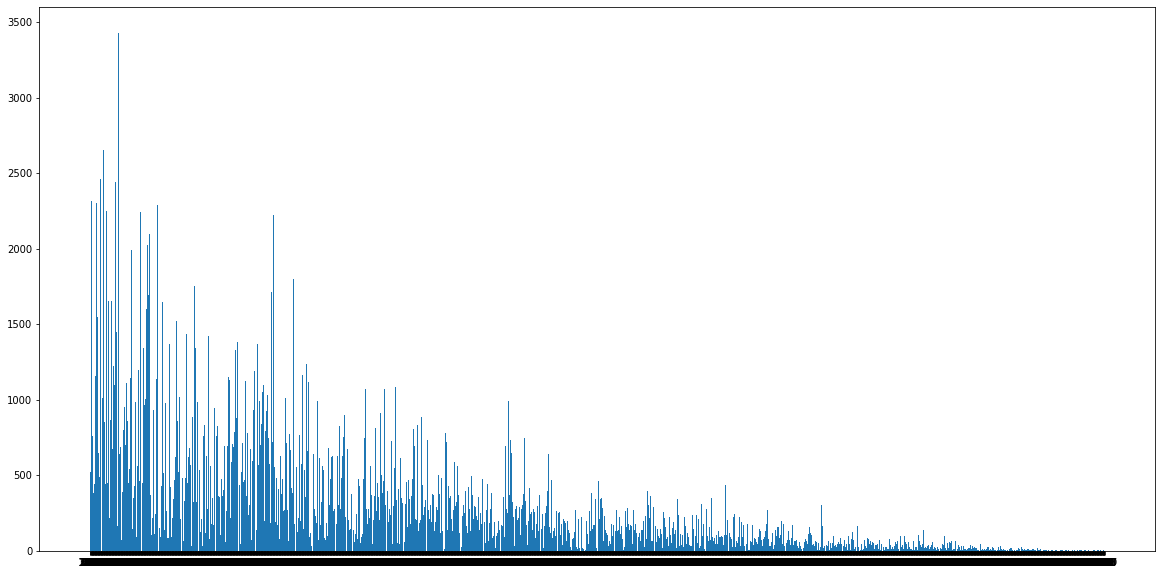

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(ratings_df["MovieID"], bins=3883)
plt.show()

In [ ]:
ratings_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [ ]:
print(len(set(ratings_df["UserID"])) == max([int(i) for i in set(ratings_df["UserID"])]))
print(max([int(i) for i in set(ratings_df["UserID"])]))

True
6040


In [ ]:
ratings_df = ratings_df.applymap(int)

In [ ]:
users_dict = {user : [] for user in set(ratings_df["UserID"])}
users_dict[1]

[]

In [ ]:
ratings_df = ratings_df.sort_values(by='Timestamp', ascending=True)
ratings_df.head(5)

UserID  MovieID  Rating  Timestamp
1000138    6040      858       4  956703932
1000153    6040     2384       4  956703954
999873     6040      593       5  956703954
1000007    6040     1961       4  956703977
1000192    6040     2019       5  956703977

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
ratings_df_gen = ratings_df.iterrows()
users_dict_for_history_len = {user : [] for user in set(ratings_df["UserID"])}
for data in ratings_df_gen:
    users_dict[data[1]['UserID']].append((data[1]['MovieID'], data[1]['Rating']))
    if data[1]['Rating'] >= 4:
        users_dict_for_history_len[data[1]['UserID']].append((data[1]['MovieID'], data[1]['Rating']))

In [ ]:
users_history_lens = [len(users_dict_for_history_len[u]) for u in set(ratings_df["UserID"])]

In [ ]:
len(users_history_lens)

6040

In [ ]:
users_dict[1]

[(3186, 4),
 (1721, 4),
 (1270, 5),
 (1022, 5),
 (2340, 3),
 (1836, 5),
 (3408, 4),
 (1207, 4),
 (2804, 5),
 (260, 4),
 (720, 3),
 (1193, 5),
 (919, 4),
 (608, 4),
 (2692, 4),
 (1961, 5),
 (2028, 5),
 (3105, 5),
 (938, 4),
 (1035, 5),
 (1962, 4),
 (1028, 5),
 (2018, 4),
 (150, 5),
 (1097, 4),
 (914, 3),
 (1287, 5),
 (2797, 4),
 (1246, 4),
 (2762, 4),
 (661, 3),
 (2918, 4),
 (531, 4),
 (3114, 4),
 (2791, 4),
 (1029, 5),
 (2321, 3),
 (1197, 3),
 (594, 4),
 (2398, 4),
 (1545, 4),
 (527, 5),
 (745, 3),
 (595, 5),
 (588, 4),
 (1, 5),
 (2687, 3),
 (783, 4),
 (2294, 4),
 (2355, 5),
 (1907, 4),
 (1566, 4),
 (48, 5)]

In [ ]:
np.save("./data/user_dict.npy", users_dict)
np.save("./data/users_histroy_len.npy", users_history_lens)

In [ ]:
users_num = max(ratings_df["UserID"])+1
items_num = max(ratings_df["MovieID"])+1

In [ ]:
print(users_num, items_num)

6041 3953


In [ ]:
### Training setting
train_users_num = int(users_num * 0.8)
train_items_num = items_num
print(train_users_num, train_items_num)

4832 3953


In [ ]:
train_users_dict = {k:users_dict[k] for k in range(1, train_users_num+1)}
train_users_history_lens = users_history_lens[:train_users_num]
print(len(train_users_dict),len(train_users_history_lens))


4832 4832


In [ ]:
### Evaluating setting
eval_users_num = int(users_num * 0.2)
eval_items_num = items_num
print(eval_users_num, eval_items_num)

1208 3953


In [ ]:
eval_users_dict = {k:users_dict[k] for k in range(users_num-eval_users_num, users_num)}
eval_users_history_lens = users_history_lens[-eval_users_num:]
print(len(eval_users_dict),len(eval_users_history_lens))

1208 1208


In [ ]:
users_dict, users_history_lens, movies_id_to_movies, users_num, items_num

({1: [(3186, 4),
   (1721, 4),
   (1270, 5),
   (1022, 5),
   (2340, 3),
   (1836, 5),
   (3408, 4),
   (1207, 4),
   (2804, 5),
   (260, 4),
   (720, 3),
   (1193, 5),
   (919, 4),
   (608, 4),
   (2692, 4),
   (1961, 5),
   (2028, 5),
   (3105, 5),
   (938, 4),
   (1035, 5),
   (1962, 4),
   (1028, 5),
   (2018, 4),
   (150, 5),
   (1097, 4),
   (914, 3),
   (1287, 5),
   (2797, 4),
   (1246, 4),
   (2762, 4),
   (661, 3),
   (2918, 4),
   (531, 4),
   (3114, 4),
   (2791, 4),
   (1029, 5),
   (2321, 3),
   (1197, 3),
   (594, 4),
   (2398, 4),
   (1545, 4),
   (527, 5),
   (745, 3),
   (595, 5),
   (588, 4),
   (1, 5),
   (2687, 3),
   (783, 4),
   (2294, 4),
   (2355, 5),
   (1907, 4),
   (1566, 4),
   (48, 5)],
  2: [(1198, 4),
   (1217, 3),
   (1210, 4),
   (2717, 3),
   (1293, 5),
   (2943, 4),
   (1225, 5),
   (1193, 5),
   (318, 5),
   (2858, 4),
   (3030, 4),
   (1213, 2),
   (1945, 5),
   (1207, 4),
   (3095, 4),
   (593, 5),
   (3468, 5),
   (515, 5),
   (1873, 4),
   (1090

In [ ]:
def evaluate(recommender, env, check_movies = False, top_k=False):

    # episodic reward 리셋
    episode_reward = 0
    steps = 0
    mean_precision = 0
    mean_ndcg = 0
    # Environment 리셋
    user_id, items_ids, done = env.reset()
    if check_movies:
        print(f'user_id : {user_id}, rated_items_length:{len(env.user_items)}')
        print('items : \n', np.array(env.get_items_names(items_ids)))

    while not done:

        # Observe current state & Find action
        ## Embedding 해주기
        user_eb = recommender.embedding_network.get_layer('user_embedding')(np.array(user_id))
        items_eb = recommender.embedding_network.get_layer('movie_embedding')(np.array(items_ids))
        ## SRM으로 state 출력
        state = recommender.srm_ave([np.expand_dims(user_eb, axis=0), np.expand_dims(items_eb, axis=0)])
        ## Action(ranking score) 출력
        action = recommender.actor.network(state)
        ## Item 추천
        recommended_item = recommender.recommend_item(action, env.recommended_items, top_k=top_k)
        if check_movies:
            print(f'recommended items ids : {recommended_item}')
            print(f'recommened items : \n {np.array(env.get_items_names(recommended_item), dtype=object)}')
        # Calculate reward & observe new state (in env)
        ## Step
        next_items_ids, reward, done, _ = env.step(recommended_item, top_k=top_k)
        if top_k:
            correct_list = [1 if r > 0 else 0 for r in reward]
            # ndcg
            dcg, idcg = calculate_ndcg(correct_list, [1 for _ in range(len(reward))])
            mean_ndcg += dcg/idcg
            
            #precision
            correct_num = top_k-correct_list.count(0)
            mean_precision += correct_num/top_k
            
        reward = np.sum(reward)
        items_ids = next_items_ids
        episode_reward += reward
        steps += 1
        
        if check_movies:
            print(f'precision : {correct_num/top_k}, dcg : {dcg:0.3f}, idcg : {idcg:0.3f}, ndcg : {dcg/idcg:0.3f}, reward : {reward}')
            print()
        break
    
    if check_movies:
        print(f'precision : {mean_precision/steps}, ngcg : {mean_ndcg/steps}, episode_reward : {episode_reward}')
        print()
    
    return mean_precision/steps, mean_ndcg/steps

def calculate_ndcg(rel, irel):
    dcg = 0
    idcg = 0
    rel = [1 if r>0 else 0 for r in rel]
    for i, (r, ir) in enumerate(zip(rel, irel)):
        dcg += (r)/np.log2(i+2)
        idcg += (ir)/np.log2(i+2)
    return dcg, idcg

In [ ]:
tf.keras.backend.set_floatx('float64')

In [ ]:
sum_precision = 0
sum_ndcg = 0
TOP_K = 10

for user_id in eval_users_dict.keys():
    env = OfflineEnv(eval_users_dict, users_history_lens, movies_id_to_movies, STATE_SIZE, fix_user_id=user_id)
    recommender = DRRAgent(env, users_num, items_num, STATE_SIZE)
    recommender.actor.build_networks()
    recommender.critic.build_networks()
    recommender.load_model('./save_weights/actor_10000.h5', 
                           './save_weights/critic_10000.h5')
    precision, ndcg = evaluate(recommender, env, top_k=TOP_K)
    sum_precision += precision
    sum_ndcg += ndcg
    
print(f'precision@{TOP_K} : {sum_precision/len(eval_users_dict)}, ndcg@{TOP_K} : {sum_ndcg/len(eval_users_dict)}')

OSError: ignored

In [ ]:
sum_precision = 0
sum_ndcg = 0
TOP_K = 10

for user_id in eval_users_dict.keys():
    env = OfflineEnv(eval_users_dict, users_history_lens, movies_id_to_movies, STATE_SIZE, fix_user_id=user_id)
    recommender = DRRAgent(env, users_num, items_num, STATE_SIZE)
    recommender.actor.build_networks()
    recommender.critic.build_networks()
    recommender.load_model('./save_weights/actor_8000.h5', 
                           './save_weights/critic_8000.h5')
    precision, ndcg = evaluate(recommender, env, TOP_K=10)
    sum_precision += precision
    sum_ndcg += ndcg
    
print(f'precision@{TOP_K} : {sum_precision/len(eval_users_dict)}, ndcg@{TOP_K} : {sum_ndcg/len(eval_users_dict)}')